<a href="https://colab.research.google.com/github/siribafna/Myocardial-Infarction-Predictions/blob/main/MI_Blended_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%% Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns 

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Get data from csv
#df = pd.read_csv("/content/drive/MyDrive/CS 4475/MI_clean.csv")
df = pd.read_csv('https://raw.githubusercontent.com/siribafna/Myocardial-Infarction-Predictions/main/MI-cleaned-TT.csv', sep=',')

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
results = []


In [ ]:
names = ['LDA', 'QDA', 'LOGR', 'KNN', 'DT', 'RF', 'SVM', 'NN']

In [ ]:
#LDA libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#define predictor and response variables
#X = df[['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK']]
X = df[['L_BLOOD', 'AGE', 'K_BLOOD', 'S_AD_ORIT', 'TIME_B_S', 'ZSN', 'ROE', 'AST_BLOOD', 'ALT_BLOOD', 'RAZRIV']]
y = df['LET_IS']!=0

#Fit the LDA model
LDAmodel = LinearDiscriminantAnalysis()
LDAmodel.fit(X, y)
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(LDAmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
results.append(scores)
print(np.mean(scores))

0.8956688741721854


In [ ]:
#QDA Libraries
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

#define predictor and response variables
X = df[['L_BLOOD', 'AGE', 'K_BLOOD', 'S_AD_ORIT', 'TIME_B_S', 'ZSN', 'ROE', 'AST_BLOOD', 'ALT_BLOOD', 'RAZRIV']]
y = df['LET_IS']!=0

#Fit the QDA model
QDAmodel = QuadraticDiscriminantAnalysis()
QDAmodel.fit(X, y)
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(QDAmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
results.append(scores)
print(np.mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8614083885209713


In [ ]:
#Libraries for Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

#define predictor and response variables
X = df[['L_BLOOD', 'AGE', 'K_BLOOD', 'S_AD_ORIT', 'TIME_B_S', 'ZSN', 'ROE', 'AST_BLOOD', 'ALT_BLOOD', 'RAZRIV']]
y = df['LET_IS']!=0
LOGRmodel = LogisticRegression()
LOGRmodel.fit(X, y)
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(LOGRmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
results.append(scores)
print(np.mean(scores)) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8998660779985282


In [ ]:
#Libraries for K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#define predictor and response variables
X = df[['L_BLOOD', 'AGE', 'K_BLOOD', 'S_AD_ORIT', 'TIME_B_S', 'ZSN', 'ROE', 'AST_BLOOD', 'ALT_BLOOD', 'RAZRIV']]
y = df['LET_IS']!=0

#Fit the KNN model
KNNmodel = KNeighborsClassifier(n_neighbors = 5)
KNNmodel.fit(X, y)
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(KNNmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
results.append(scores)
print(np.mean(scores))

0.8479087564385578


In [ ]:
#Decision Trees libraries
from sklearn.tree import DecisionTreeClassifier

#define predictor and response variables
X = df[['L_BLOOD', 'AGE', 'K_BLOOD', 'S_AD_ORIT', 'TIME_B_S', 'ZSN', 'ROE', 'AST_BLOOD', 'ALT_BLOOD', 'RAZRIV']]
y = df['LET_IS']!=0

#Fit the LDA model
DTmodel = DecisionTreeClassifier()
DTmodel.fit(X, y)
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(DTmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
results.append(scores)
print(np.mean(scores))

0.8353200883002209


In [ ]:
#Random Forrest Trees libraries
from sklearn.ensemble import RandomForestClassifier

#define predictor and response variables
X = df[['L_BLOOD', 'AGE', 'K_BLOOD', 'S_AD_ORIT', 'TIME_B_S', 'ZSN', 'ROE', 'AST_BLOOD', 'ALT_BLOOD', 'RAZRIV']]
y = df['LET_IS']!=0

#Fit the Random Forrest model
RFmodel = RandomForestClassifier(max_depth=4, random_state=1234)
RFmodel.fit(X, y)
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate model
scores = cross_val_score(RFmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
results.append(scores)
print(np.mean(scores))

0.8938984547461369


In [ ]:
#Support Vector Machines
from sklearn.model_selection import GridSearchCV
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#define predictor and response variables
X = df[['L_BLOOD', 'AGE', 'K_BLOOD', 'S_AD_ORIT', 'TIME_B_S', 'ZSN', 'ROE', 'AST_BLOOD', 'ALT_BLOOD', 'RAZRIV']]
y = df['LET_IS']!=0

start = time.time()
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],
             'C':[10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=5,n_jobs=-1)
gsv.fit(X,y)
end = time.time()
print("Time required ="+str(end-start)+"s")

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))


#define predictor and response variables
X = df[['L_BLOOD', 'AGE', 'K_BLOOD', 'S_AD_ORIT', 'TIME_B_S', 'ZSN', 'ROE', 'AST_BLOOD', 'ALT_BLOOD', 'RAZRIV']]
y = df['LET_IS']!=0

#Train the SVC model
SVCmodel = SVC(C= 10, gamma = 0.5 ) #Based on what the best hyperparameters are
SVCmodel.fit(X, y)

#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(SVCmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
results.append(scores)
print(np.mean(scores))


Time required =5.106146812438965s
Best HyperParameter:  {'C': 10, 'gamma': 50, 'kernel': 'rbf'}
Best Accuracy: 86.14%
0.8600838852097131


In [ ]:
#Nueral Networks Libraries
from sklearn.neural_network import MLPClassifier

#define predictor and response variables
X = df[['L_BLOOD', 'AGE', 'K_BLOOD', 'S_AD_ORIT', 'TIME_B_S', 'ZSN', 'ROE', 'AST_BLOOD', 'ALT_BLOOD', 'RAZRIV']]
y = df['LET_IS']!=0

#Train the NN model
NNmodel = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2), max_iter=500, random_state=1234)
NNmodel.fit(X, y)

#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(NNmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
results.append(scores)
print(np.mean(scores))


0.8627343635025755


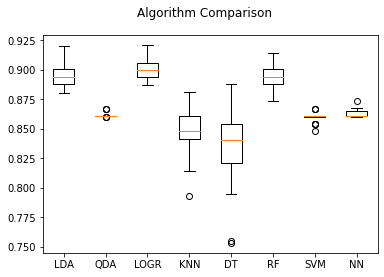

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Deep Learning??

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Alltogether 
#change to binary outcome
df.loc[df.LET_IS!=0,'LET_IS']=1

#define predictor and response variables
X = df[['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK']]
y = df['LET_IS']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8675309)

print((df.LET_IS == 1).sum())
print((df.LET_IS == 0).sum())


271
1429


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('XGB', XGBClassifier())
        ]
results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['malignant', 'benign']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
results.append(cv_results)
        names.append(name)
this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)
return final

IndentationError: ignored

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [ ]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)